In [46]:
import xarray as xr
import pandas as pd
import numpy as np
import proplot as pplot
import matplotlib.pyplot as plt
import cmaps
import cnmaps

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import transform
from cnmaps import get_map, draw_map
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature

import rioxarray
import geopandas
from shapely.geometry import mapping

import os
os.chdir('/Users/zeqinhuang/Documents/paper/acid_rain')

import warnings
warnings.filterwarnings('ignore')

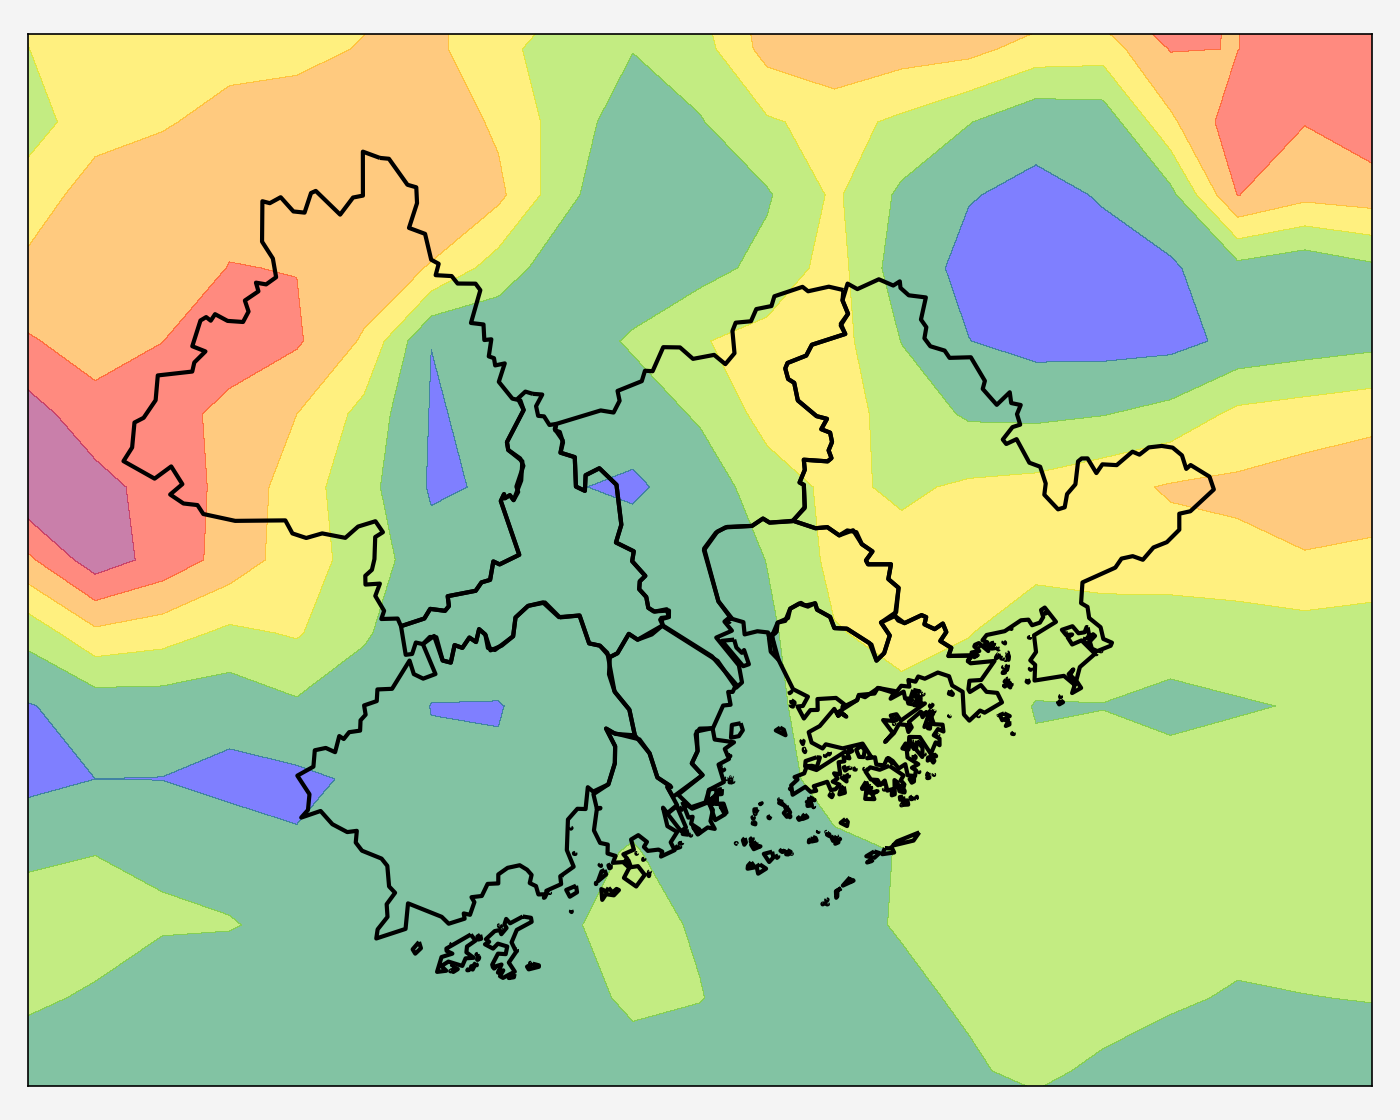

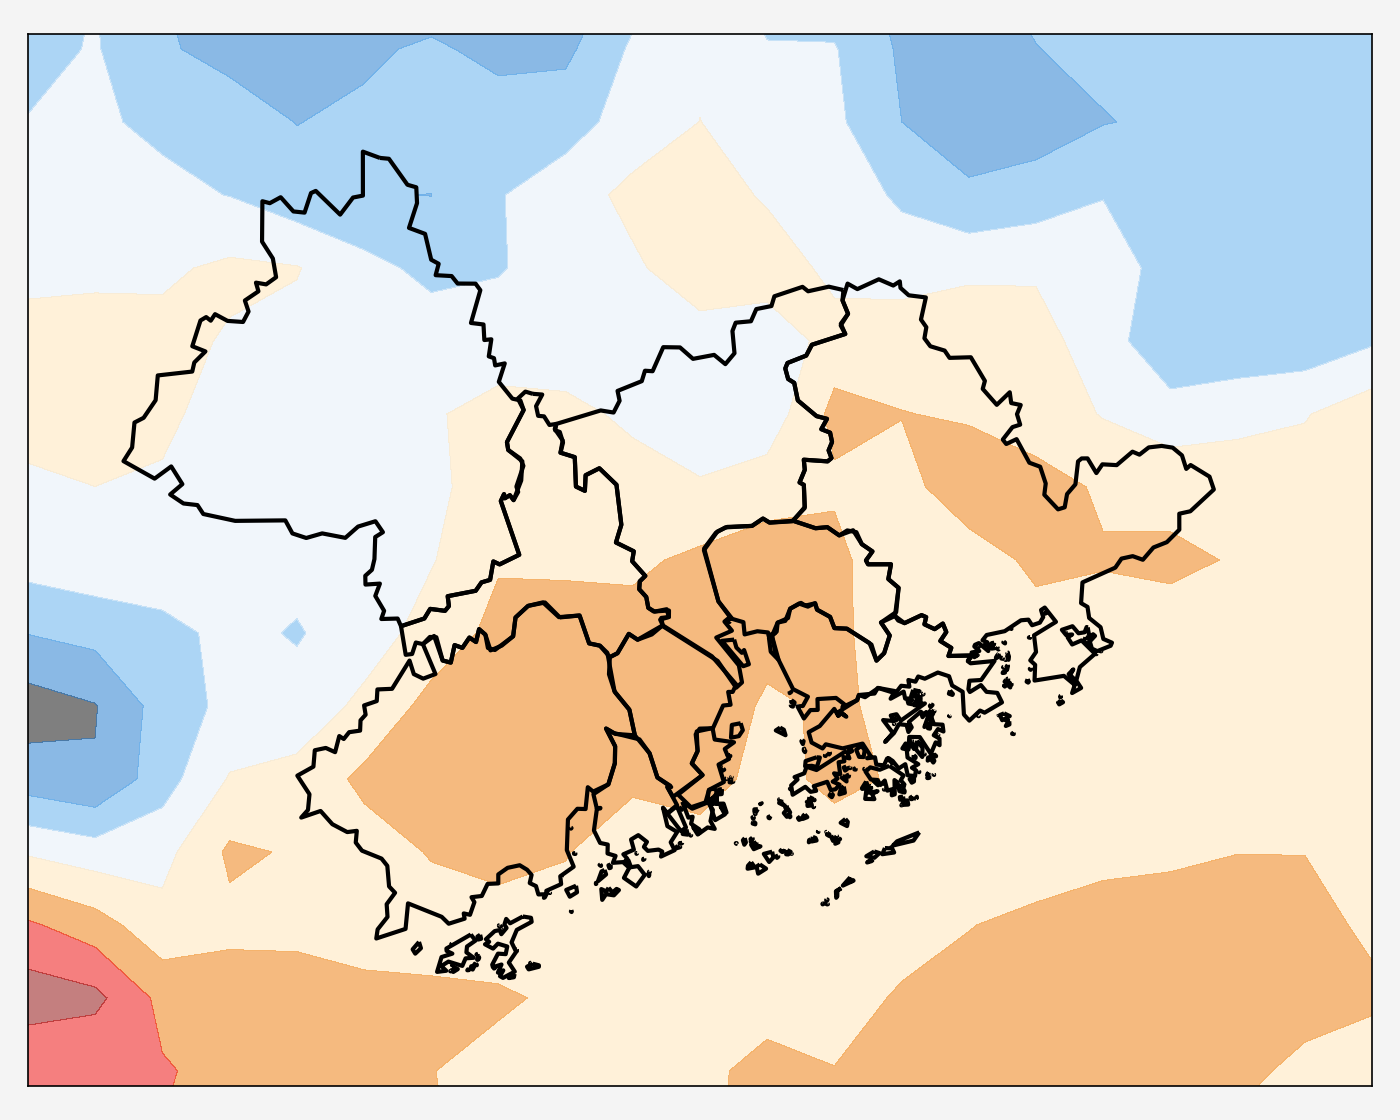

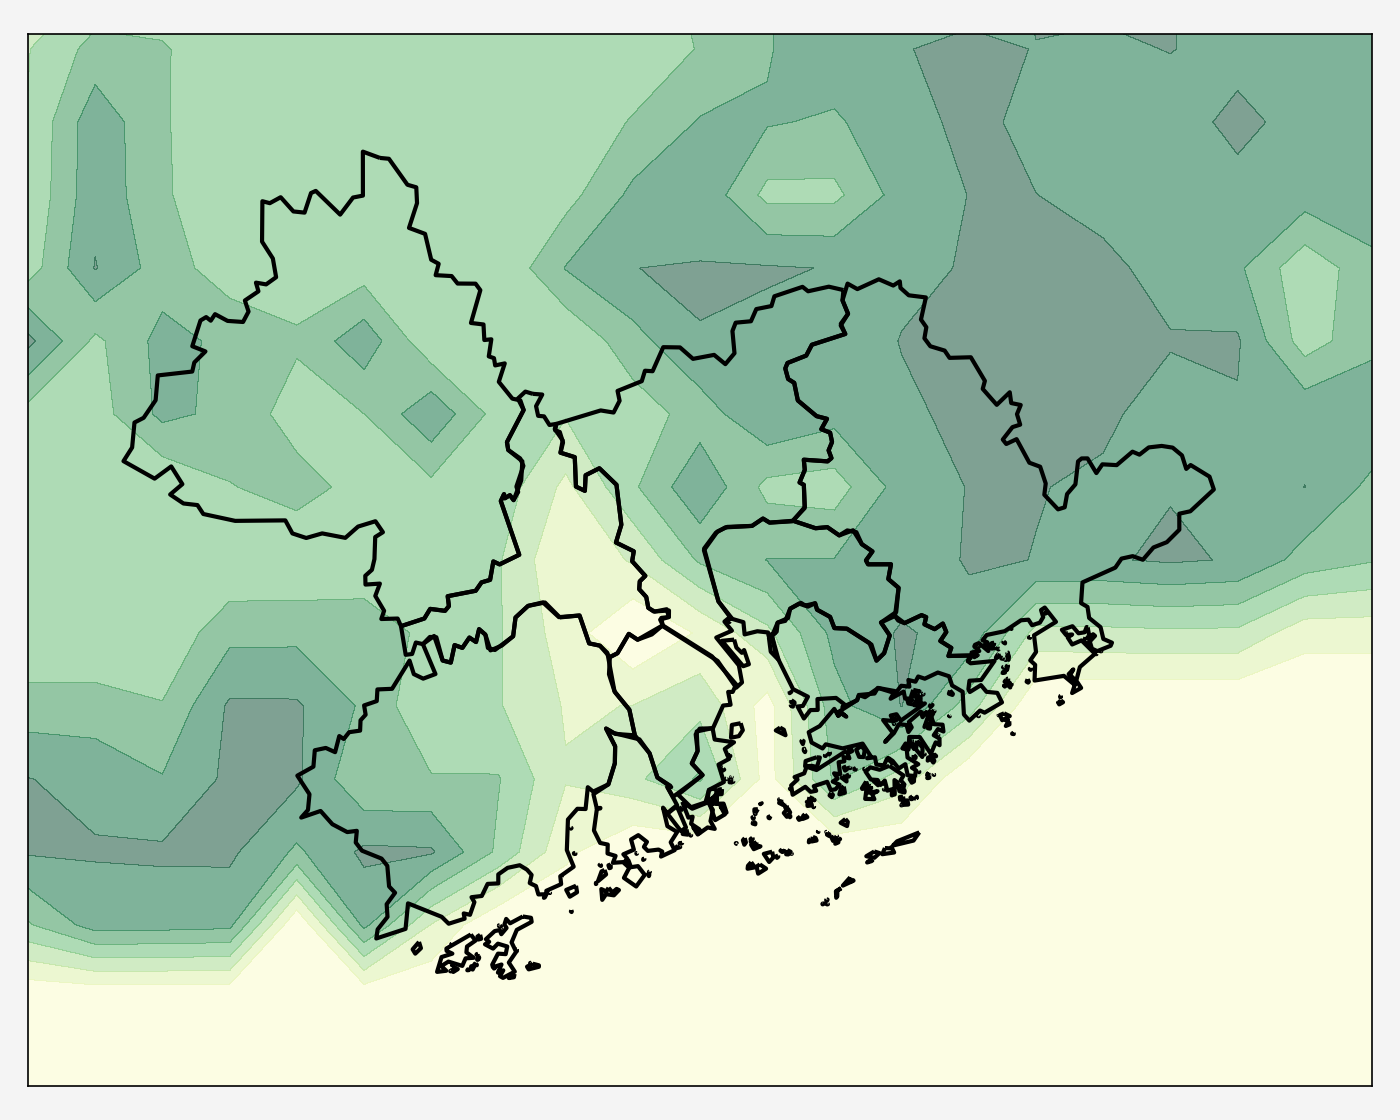

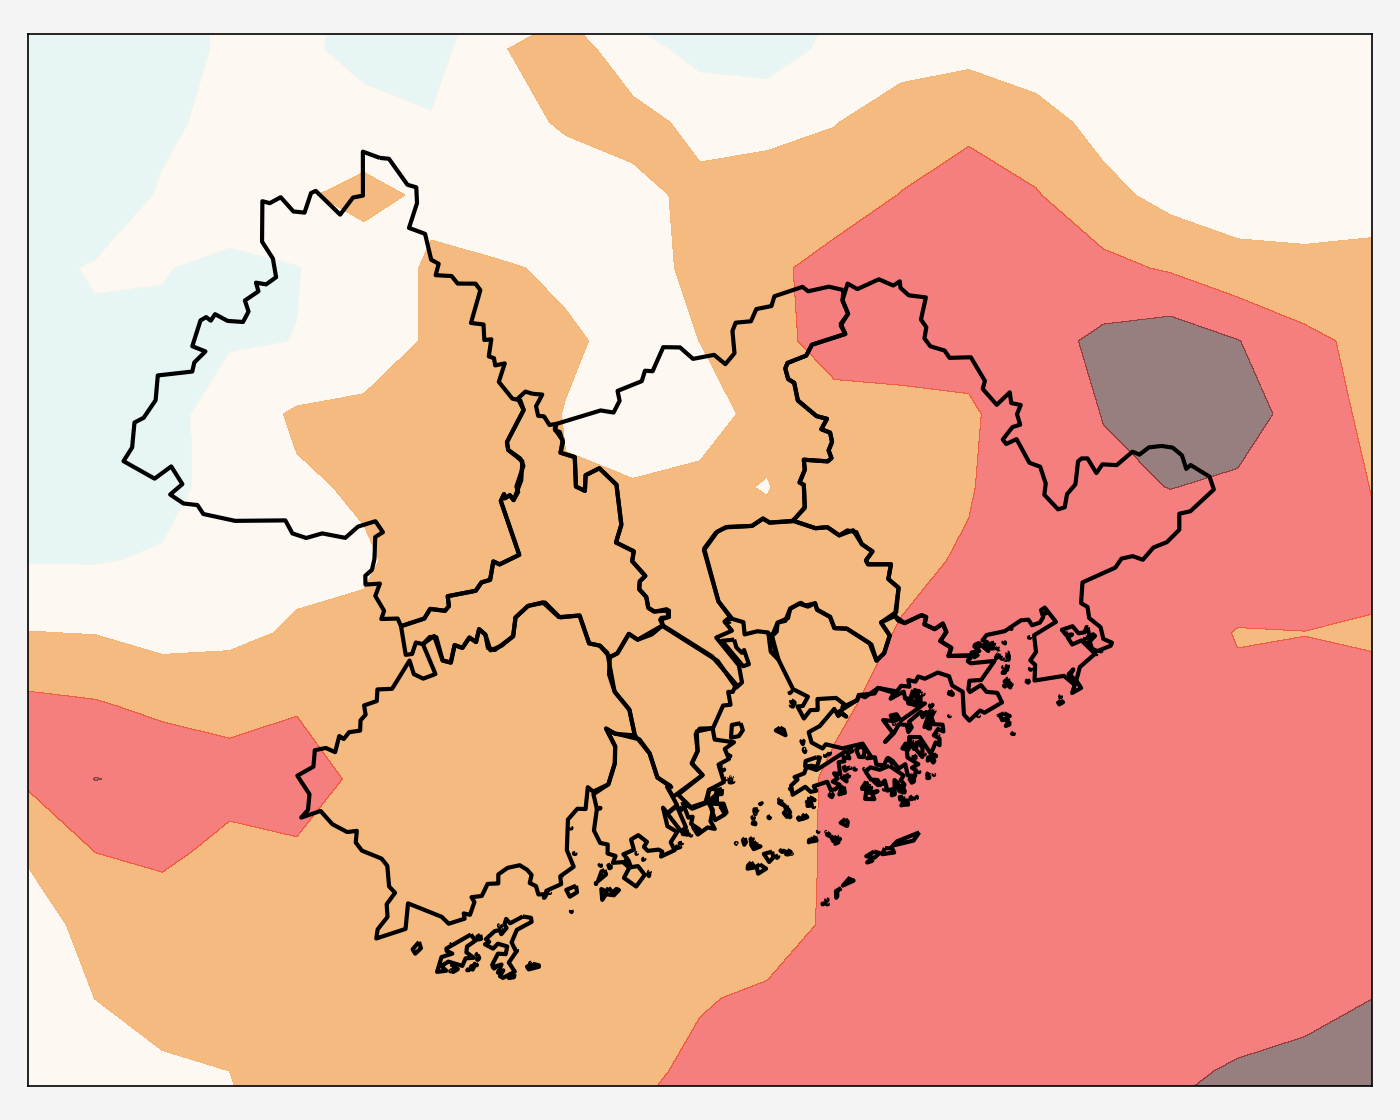

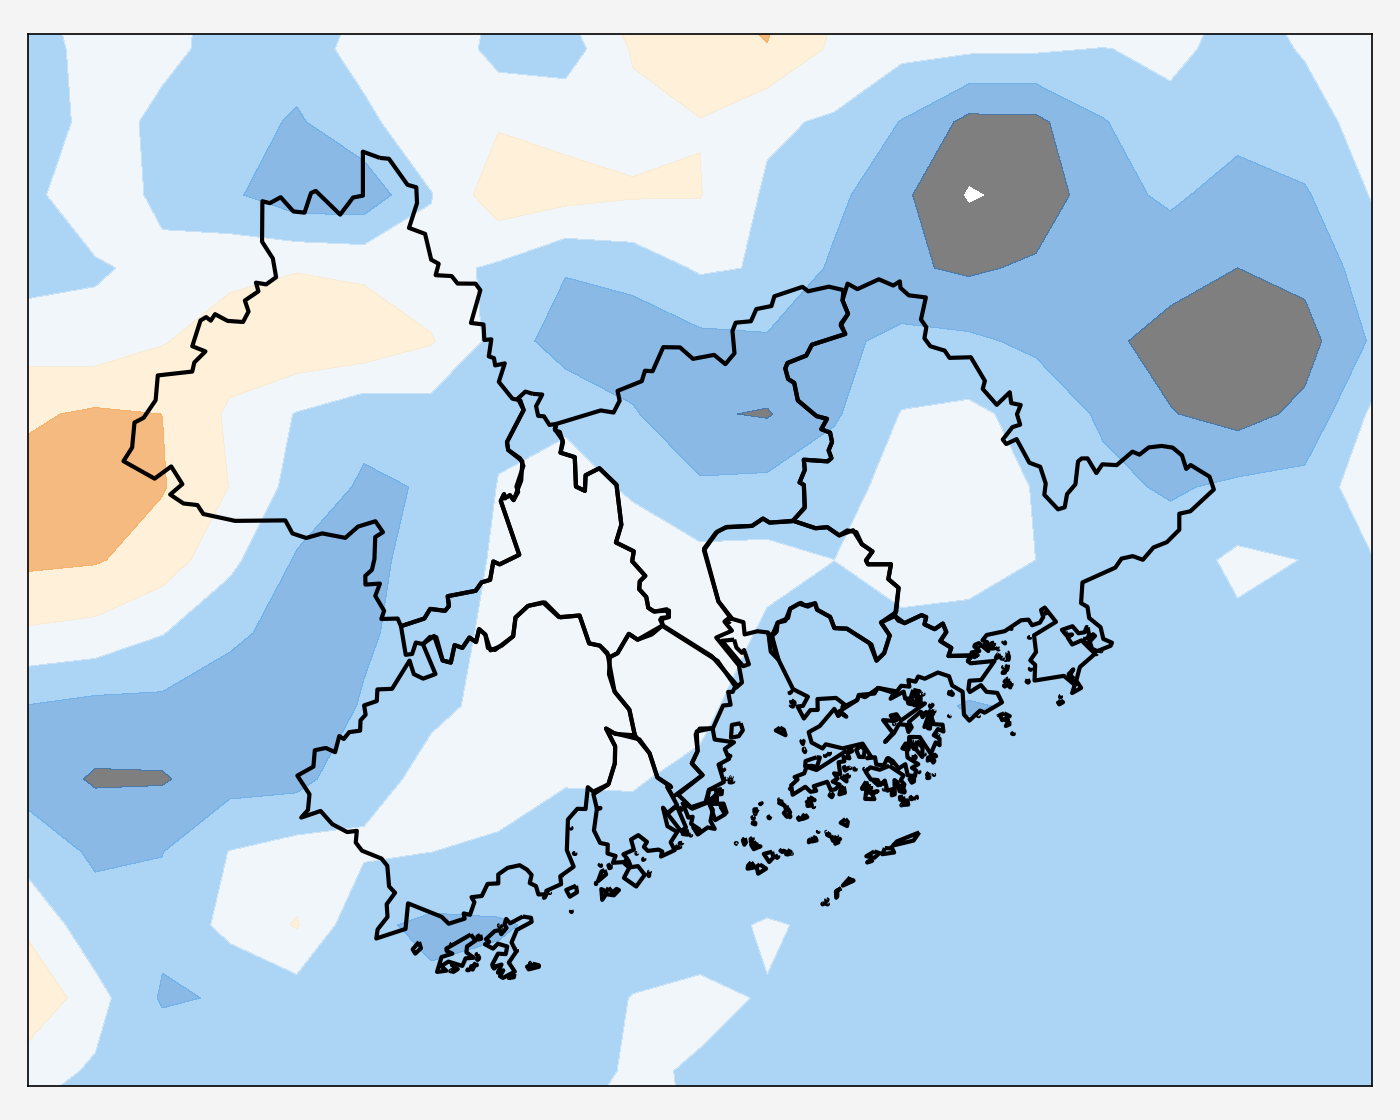

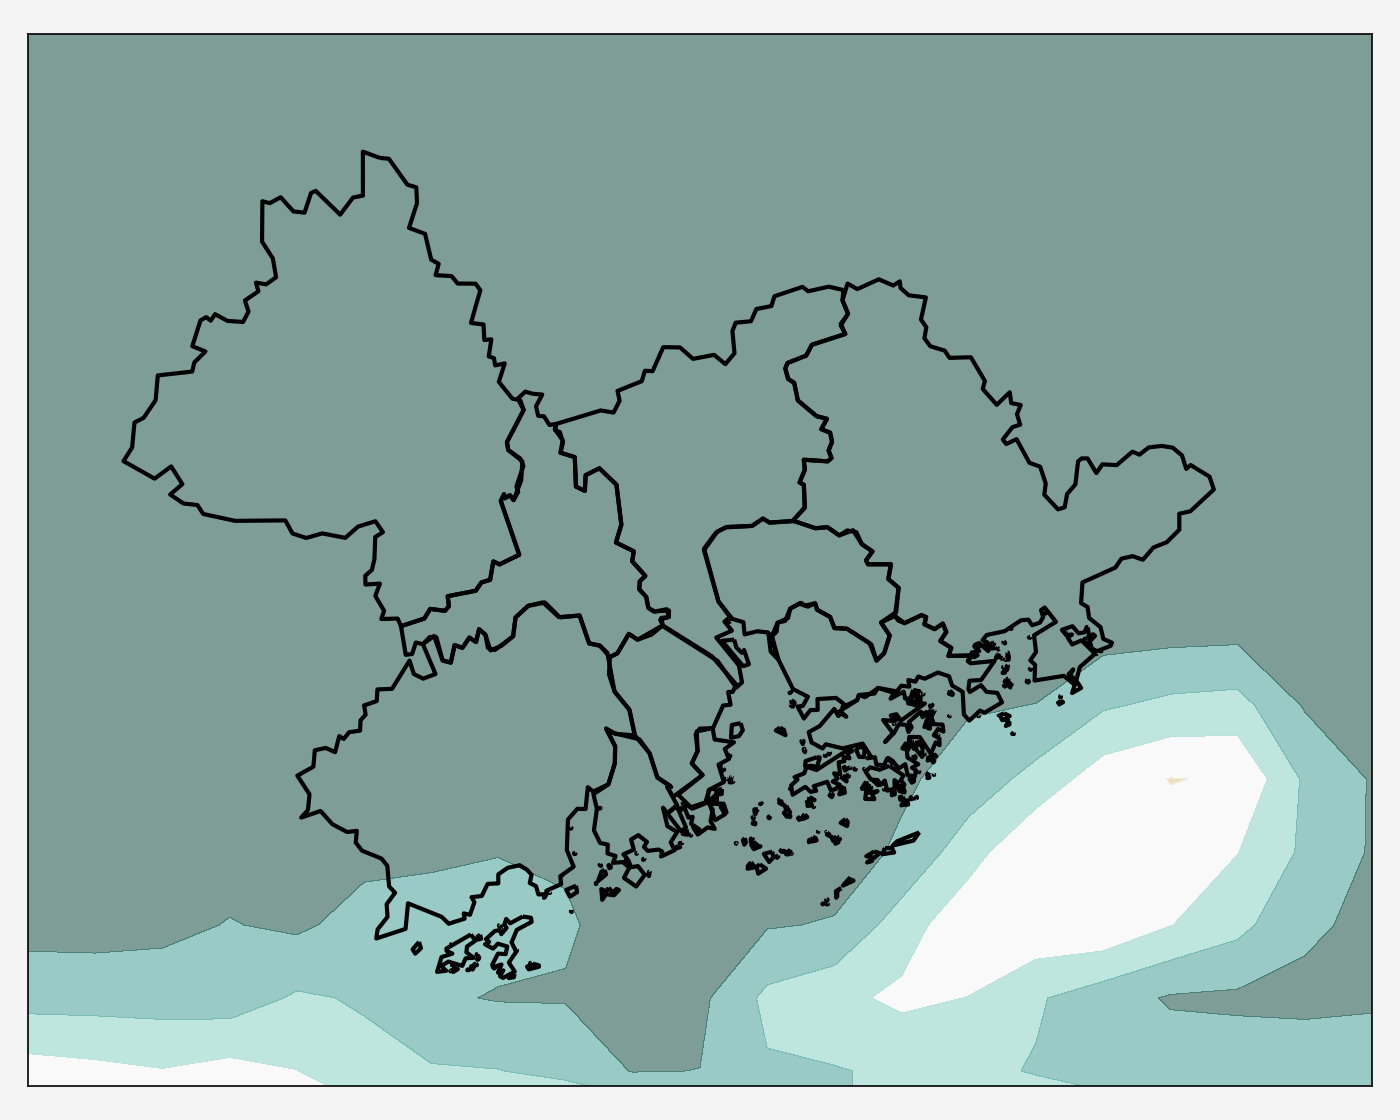

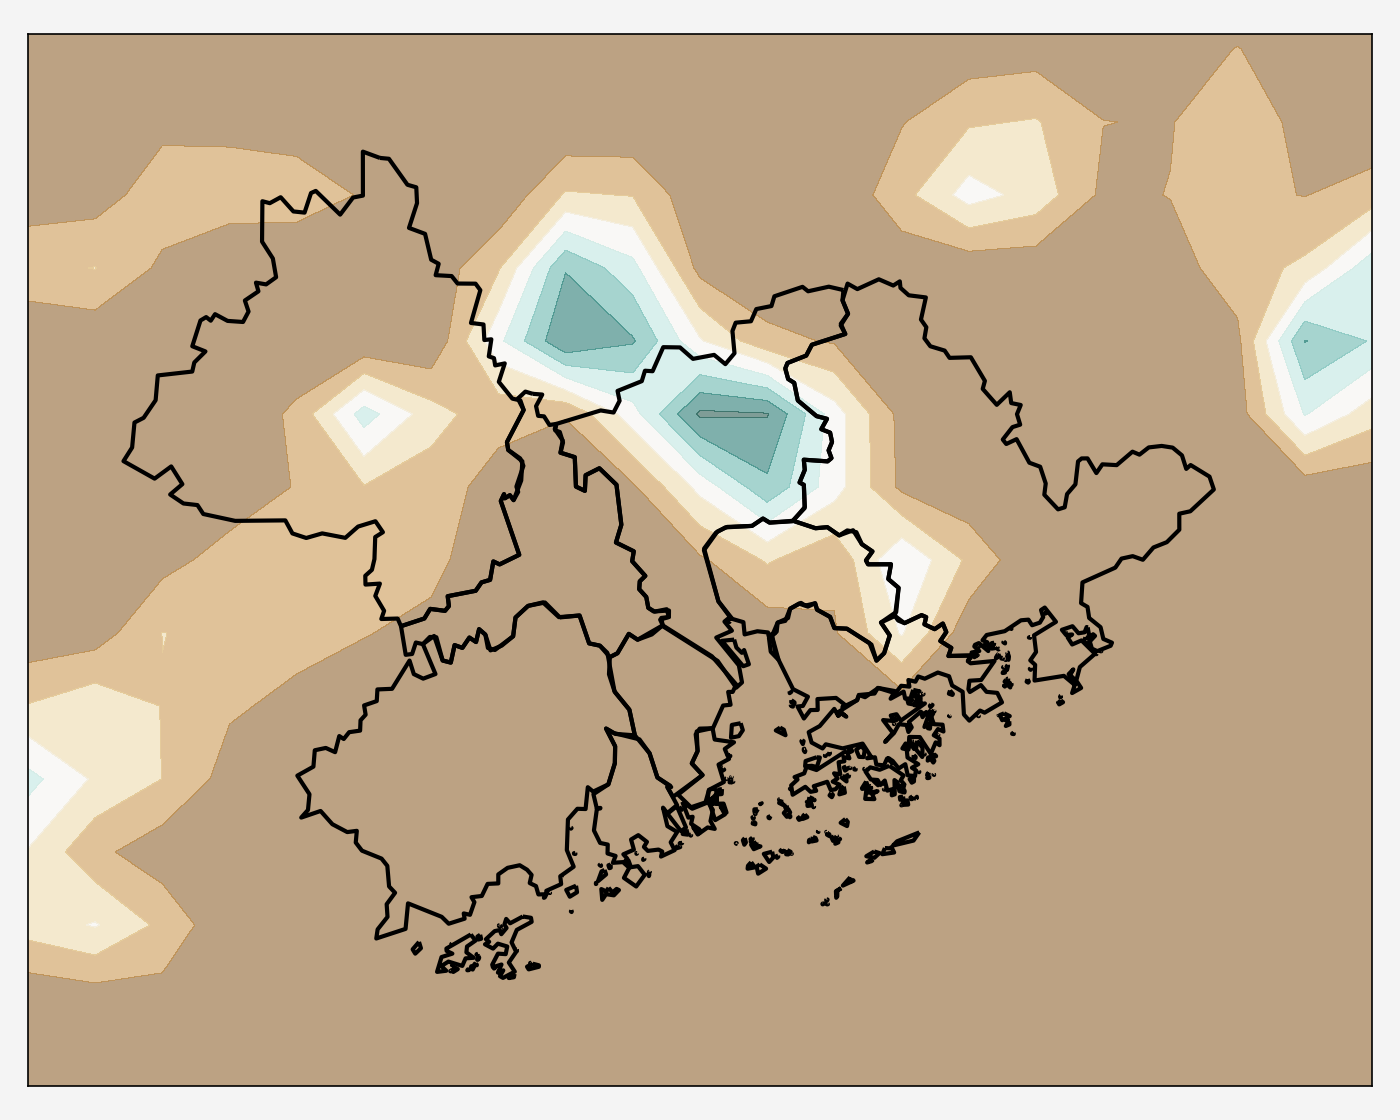

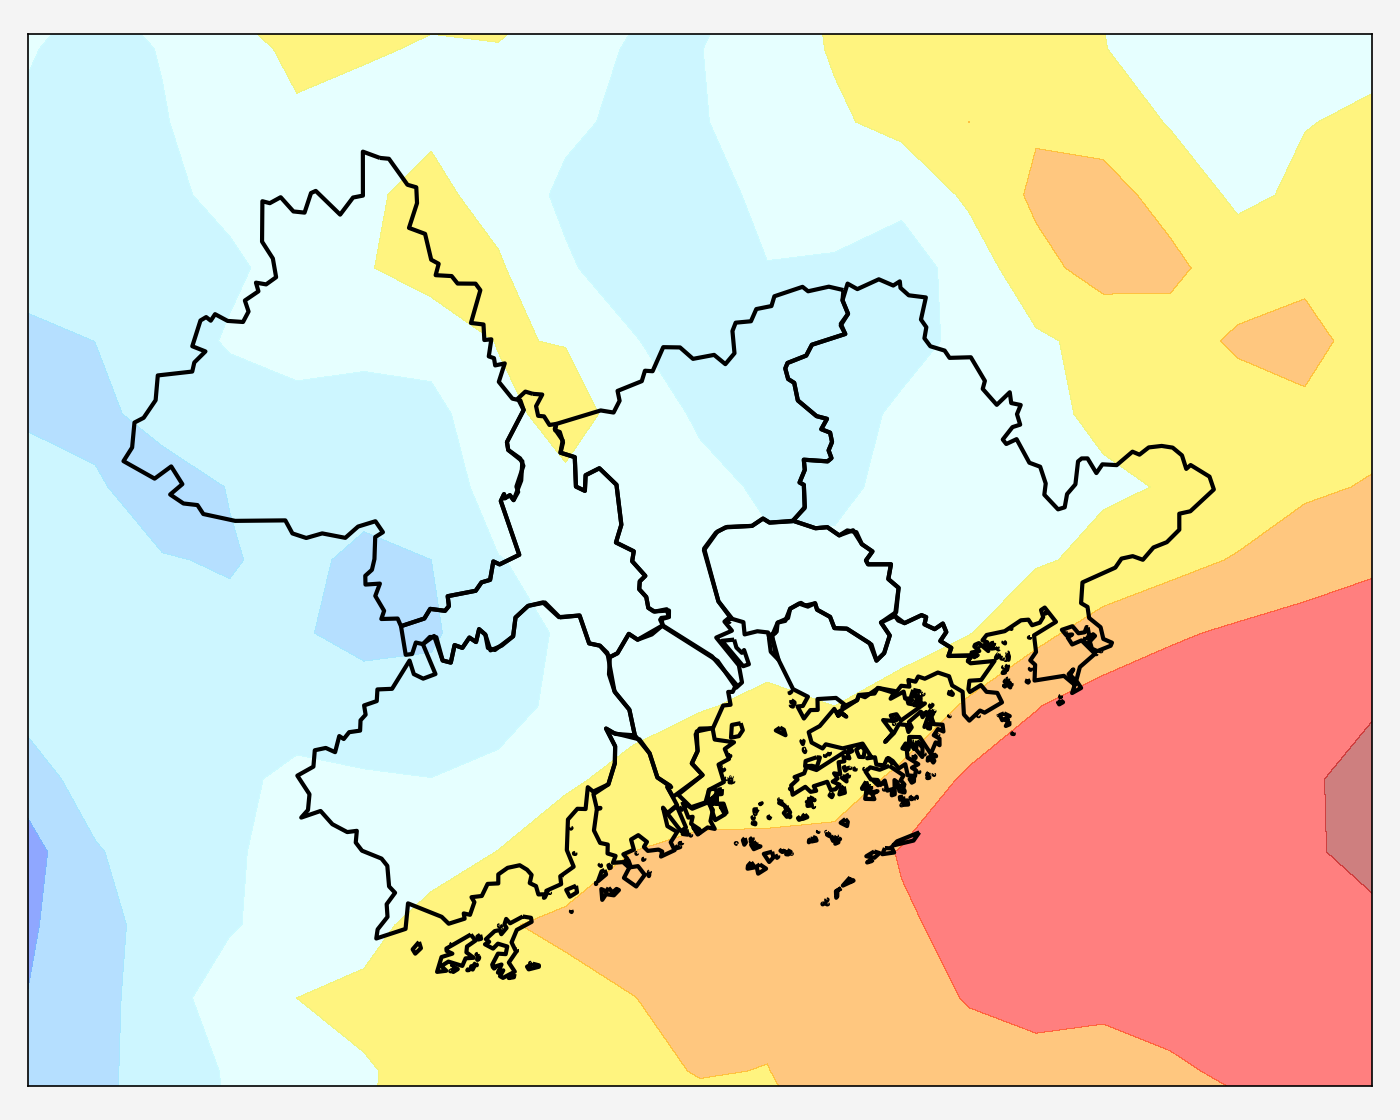

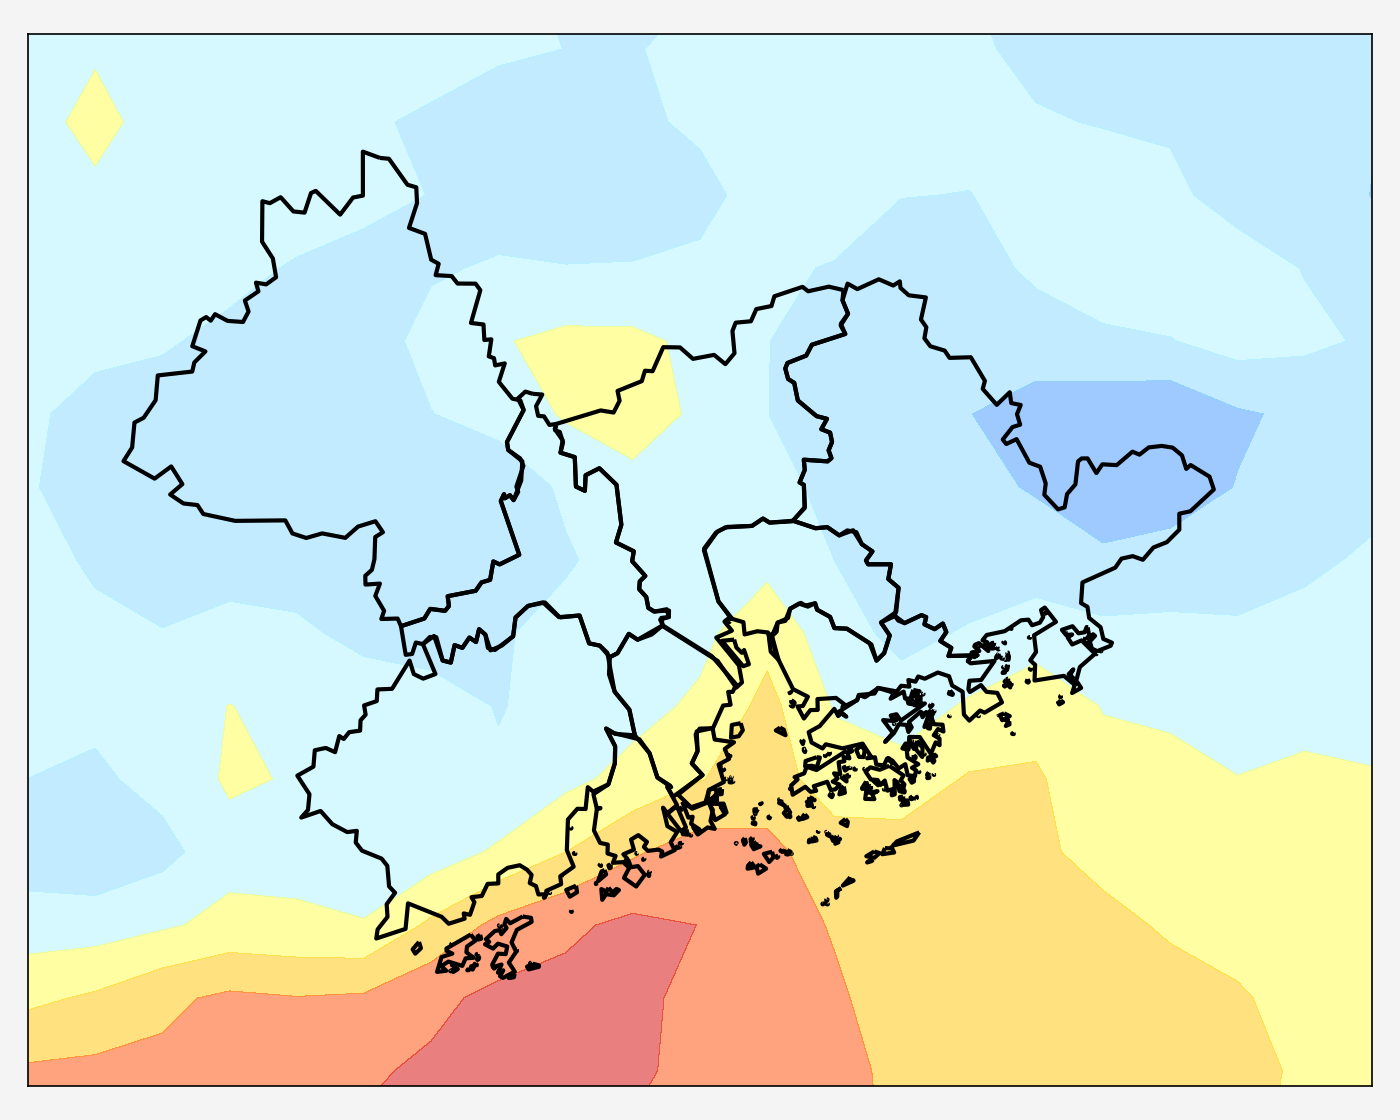

In [72]:
gba_map = geopandas.read_file('/Users/zeqinhuang/Documents/dataset/Maps/GBA_simplified.shp')
gba_map = geopandas.GeoSeries(gba_map['geometry'])

era5_vars = xr.open_dataset('ERA5_data/adaptor.mars.internal-1692195651.9895117-1592-1-52c30fc9-ae4b-4111-85b8-78808b312401.nc')
vars = ['blh','d2m','lai_hv','msl','t2m','tcc','tp','u10','v10']
maps = {
    'blh':cmaps.BlGrYeOrReVi200,'d2m':cmaps.posneg_2,'lai_hv':cmaps.MPL_YlGn,
    'msl':cmaps.hotcolr_19lev,'t2m':cmaps.posneg_2,'tcc':cmaps.CBR_drywet,'tp':cmaps.MPL_BrBG,'u10':cmaps.GMT_panoply,'v10':cmaps.GMT_panoply}
lons = era5_vars.longitude
lats = era5_vars.latitude
for var in vars:
    fig = plt.figure(figsize = (7,5.6))
    ax1 = fig.add_axes([0.02,0.02,0.96,0.96])
    ax1.grid(False)
    ax1.set_xlim([111,116])
    ax1.set_ylim([21.2,24.8])
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    data = era5_vars[var][78]
    vmax = data.max()
    vmin = data.min()
    p1 = ax1.contourf(lons, lats, data, vmax=vmax, vmin=vmin, cmap=maps[var], alpha=0.5)
    gba_map.plot(facecolor='none', edgecolor='black', ax=ax1, linewidth=1.5)
    fig.savefig('/Users/zeqinhuang/Documents/paper/acid_rain/Figures/era5_vars/' + var + '.pdf')
